In [630]:
import sympy as sp
from sympy.abc import x

import numpy as np

import matplotlib.pyplot as plt

## Compute fourier series

In [631]:
sin_truncation = 10

# create unit step function
unit_step = sp.Piecewise((0, x < 0), (1, x >= 0))

s = sp.fourier_series(unit_step, (x, -sp.pi, sp.pi))
s1 = s.truncate(n = sin_truncation)

## Plot fourier series

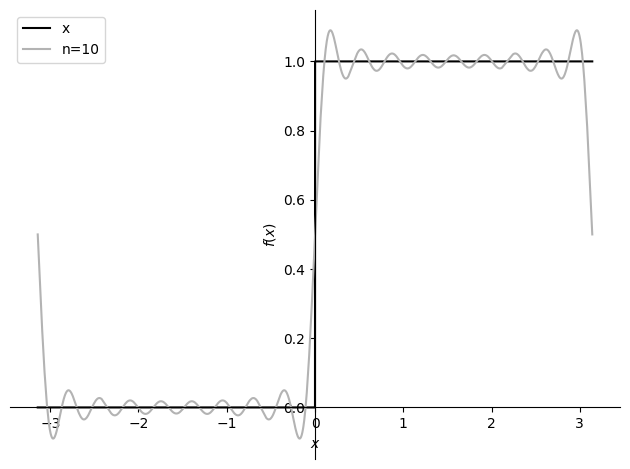

In [632]:
p = sp.plot(f, s1, (x, -sp.pi, sp.pi), show=False, legend=True)

p[0].line_color = (0, 0, 0)
p[0].label = 'x'
p[1].line_color = (0.7, 0.7, 0.7)
p[1].label = 'n=' + str(sin_truncation)
p.show()

# Manually compute fourier series (bug: shifting along y axis by 1)

In [541]:
# dx = 0.005

# start_time = 0.0
# end_time = 1.0

# length = int((end_time-start_time) / dx)

# # x axis
# x = np.arange(start_time, end_time , dx, dtype=float)

# # y axis

# # step function
# y = np.ones(length)
# y[0: int(length/2)] = np.zeros(int(length/2))

# # # sine wave
# # y = np.sin(x * 2* np.pi)

# # fundamental period (smallest period after which the sequence repeats itself)
# L = 1.0

In [542]:
dx = 0.005

# fundamental period (smallest period after which the sequence repeats itself)
L = 1.0

# x axis
x = np.arange(dx, L, dx, dtype=float)

# y axis

# step function
y = np.ones(x.size)
y[0: int(y.size/2)] = np.zeros(int(y.size/2))

# # sine wave
# y = np.sin(x * 2* np.pi)


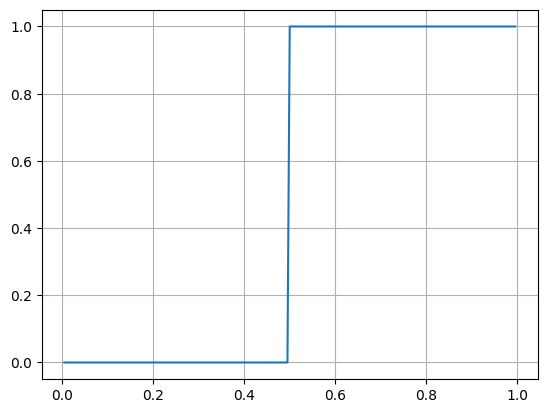

In [543]:
plt.plot(x, y)
plt.grid()
plt.show(block=False)

## Compute fourier series coefficients

In [544]:
A0 = (2/L) * np.sum(y* np.ones(x.size))*dx;
# equivalent to A0 = (2/L)*np.sum(y* np.ones(x.size)*dx), but numerically more precise since repeated addition is avoided

## Compute fourier series

In [545]:
sine_wave_order = 100

# compute first term of fourier series
ffs_1 = (A0/2.0)
ffs_2 = np.zeros(y.size)

for k in range(sine_wave_order+1):
    Ak = (2.0/L) * np.sum(y * np.cos(2.0*np.pi*k*x/L))*dx;
    Bk = (2.0/L) * np.sum(y * np.sin(2.0*np.pi*k*x/L))*dx;
    
    # compute second term of fourier series
    ffs_2 += Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L);
    
# compute total of fourier series
ffs = ffs_1 + ffs_2    

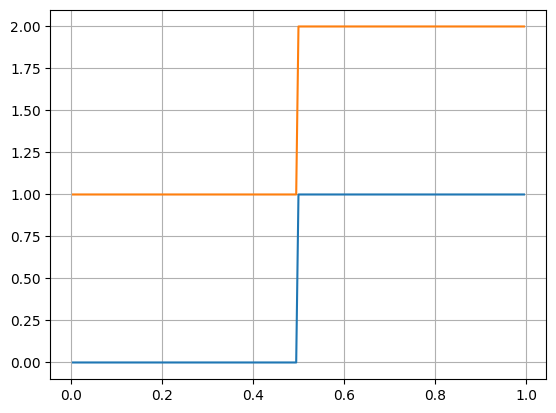

In [546]:
# original signal
plt.plot(x, y)

# fourier series approximatiion
plt.plot(x, ffs)

plt.grid()
plt.show(block=False)

In [547]:
%whos

Variable          Type             Data/Info
--------------------------------------------
A0                float64          1.0
Ak                float64          0.0
Bk                float64          -1.9993415937469236e-15
L                 float            1.0
dx                float            0.005
end_time          float            1.0
f                 Pow              x**2
ffs               ndarray          199: 199 elems, type `float64`, 1592 bytes
ffs_1             float64          0.5
ffs_2             ndarray          199: 199 elems, type `float64`, 1592 bytes
k                 int              100
length            int              200
np                module           <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt               module           <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
s                 FourierSeries    FourierSeries(x**2, (x, -<...>Formula(0, (_k, 1, oo))))
s1                Add              -4*cos(x) + cos(2*x) + pi**2/3
si